In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.classes import Array
from src.plot import plotHM, plotCuts, plotCutsPolar
from src.input import element_array, loadElePattern

## Load and plot element pattern

In [2]:
# Load data
filename = 'eleRadPattern_example.csv'
path = os.path.join('data', filename)
eleData, freq = loadElePattern(path)
print('Shape of data matrix: ', eleData.shape)
print('Frequencies in data: ', freq)

Shape of data matrix:  (180, 360, 8)
Frequencies in data:  [1427. 1518. 1695. 1950. 2170. 2300. 2500. 2690.]


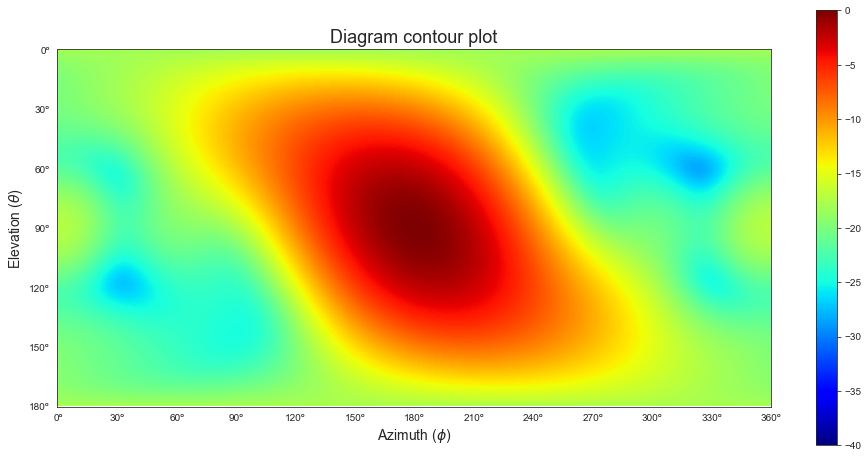

In [3]:
plotHM(eleData[:,:,0])

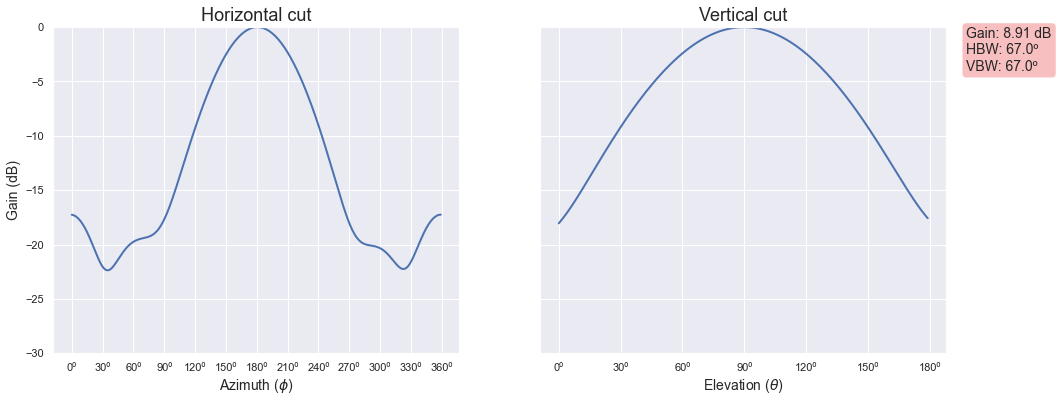

In [4]:
plotCuts(eleData[:,:,0], normalize=True)

## Define array

### No element pattern provided

[1∠0º @ [0 0 0.0], 1∠-12º @ [0 0 0.12], 1.4∠-24º @ [0 0 0.24], 1.4∠-36º @ [0 0 0.36], 1.8∠-48º @ [0 0 0.48], 1.8∠-60º @ [0 0 0.6], 1.4∠-72º @ [0 0 0.72], 1.4∠-84º @ [0 0 0.84], 1∠-96º @ [0 0 0.96], 1∠-108º @ [0 0 1.08]]
Array of 10 elements.


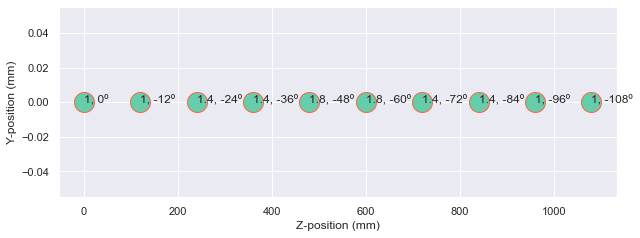

In [5]:
## Make ARRAY
amplitude = [1,1,1.4,1.4,1.8,1.8,1.4,1.4,1,1]
phaseProg = -12
phase = [phaseProg*i for i in range(10)]

sep = 0.120
xpos = [0 for _ in range(10)]
ypos = [0 for _ in range(10)]
zpos = [sep*i for i in range(10)]

# Create array of elements
elements = element_array(xpos, ypos, zpos, amplitude, phase)
print(elements)

# Create Array object
array1 = Array(elements)
print(array1)

# Plot array elements
array1.plot_array()

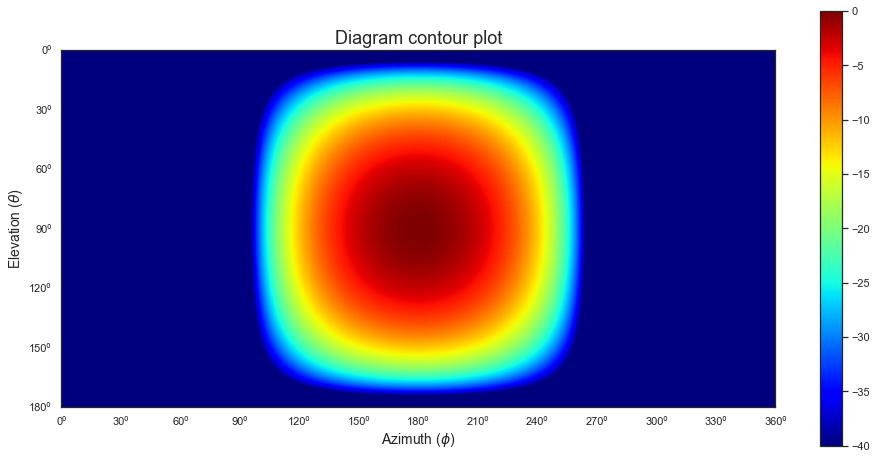

In [6]:
# Plot element pattern
plotHM(array1.elePattern)

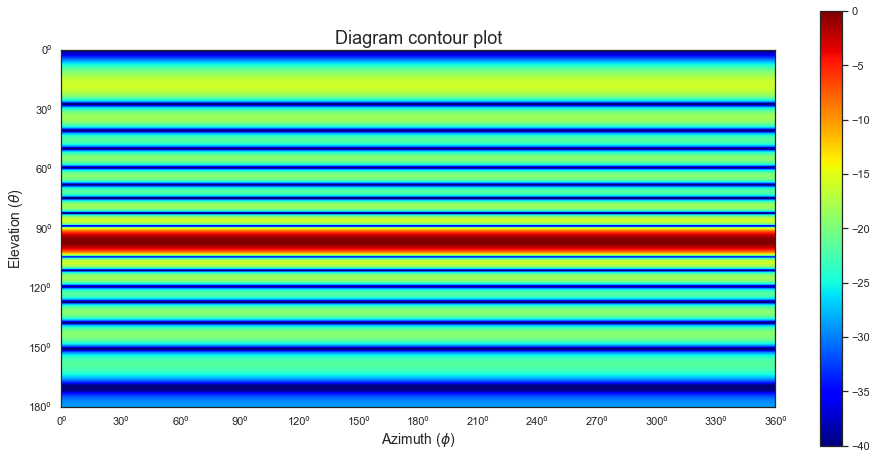

In [7]:
# Plot array factor
plotHM(array1.arrayFactor(2e9))

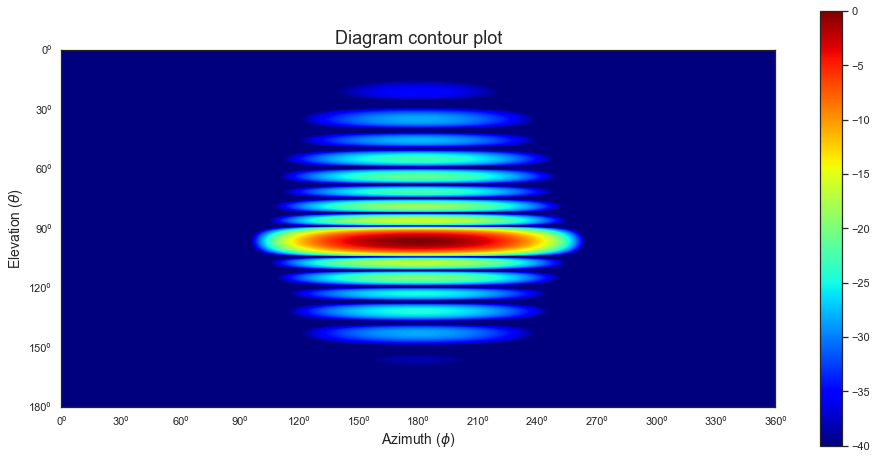

In [8]:
# Plot array pattern
plotHM(array1.arrayPattern(2e9), normalize=True)

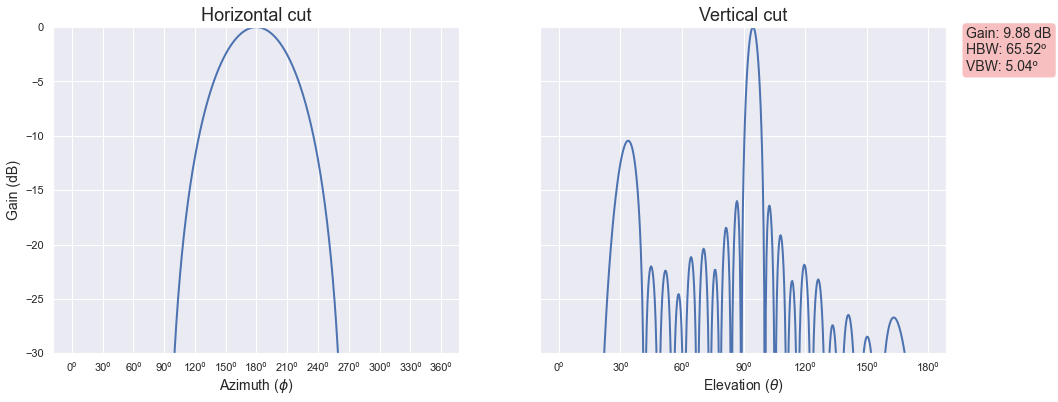

In [9]:
# Plot array pattern cuts
plotCuts(array1.arrayPattern(2.69e9), normalize=True)

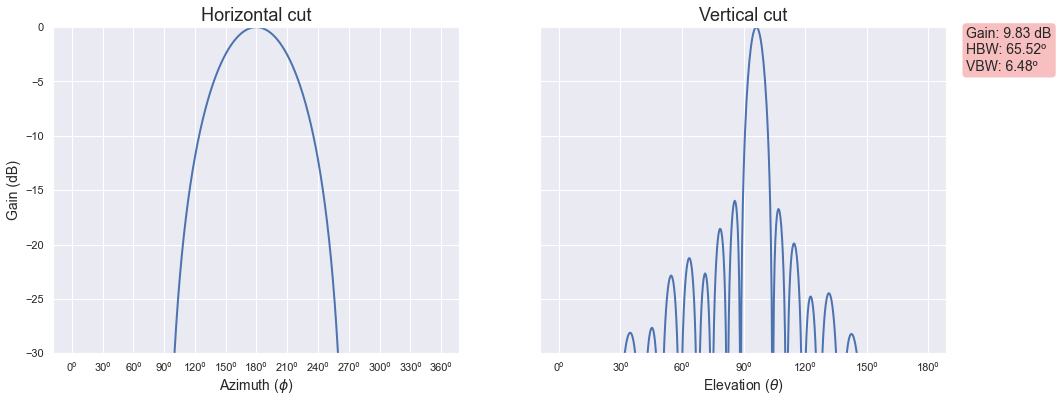

In [10]:
# Plot array pattern cuts
plotCuts(array1.arrayPattern(2e9), normalize=True)

### Element pattern provided

In [11]:
# Create Array object
array2 = Array(elements, eleData[:,:,0])
print(array2)
print('Element pattern size: ', array2.elePattern.shape)

Array of 10 elements.
Element pattern size:  (500, 1000)


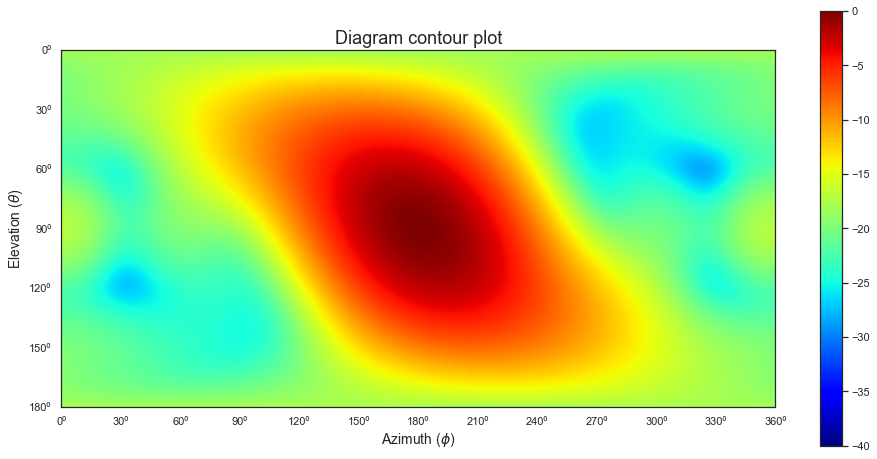

In [12]:
# Plots pattern
plotHM(array2.elePattern)

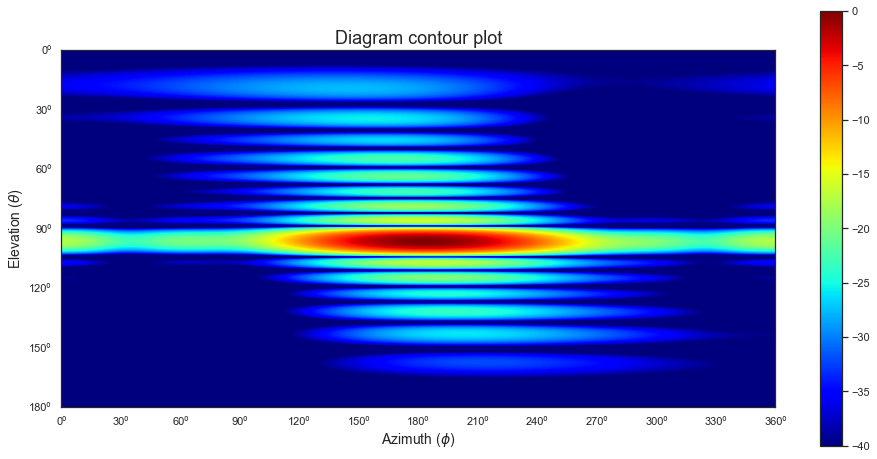

In [13]:
# Plot array pattern
plotHM(array2.arrayPattern(2e9), normalize=True)

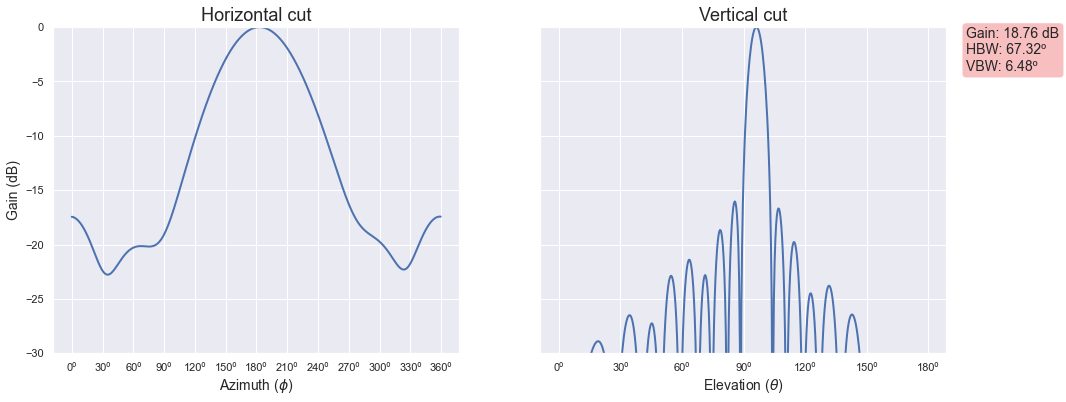

In [14]:
# Plot array pattern cuts
plotCuts(array2.arrayPattern(2e9), normalize=True)

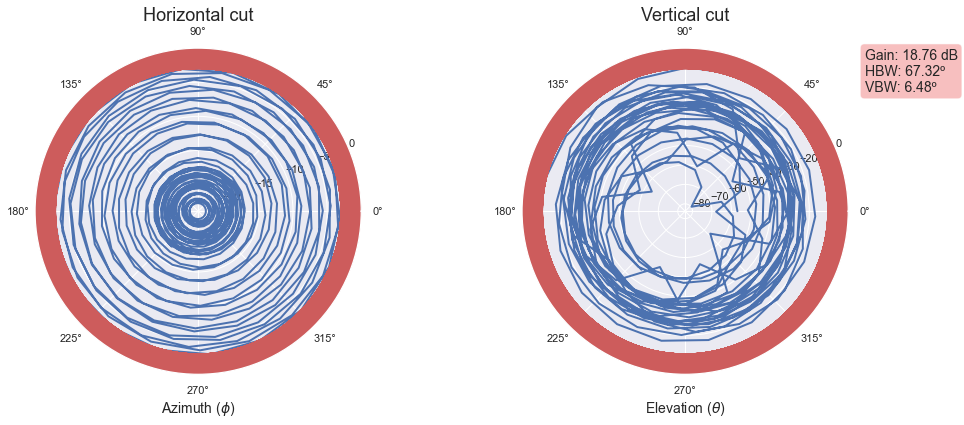

In [15]:
# Plot array pattern cuts
plotCutsPolar(array2.arrayPattern(2e9), normalize=True)